# TITANIC 
En este trabajo vamos a analizar los datos del Titanic y ver que información interesante podemos sacar y presentar.


## Primero de todo vamos a cargar los datos y prepararlos para el informe final

In [42]:
# Importación de librerias

import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [43]:
df = pd.read_csv('Data/titanic.csv')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Buscamos los valores nulos y su relevancia

In [46]:
df.isnull().sum()/len(df) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

En este caso podemos ver que hay un 19.86% de valores nulos en la columna de 'Age', para poder hacer un buen análisis es importante de reparar estos valores nulos, usaremos el metodo KNN.

También nos falta un número bastante significativo en la columna 'Cabin', un 77.10% en este caso es muy difícil poder reparar tantos valores y el nombre de la cabina/camarote dónde se alojaron no es muy relevante.
Y los datos del 0.22% de datos que faltan en 'Embarked' no es muy significativo como para necesitar un método especial para resolver los valores nulos.

### Age

Vemos que haciendo la media en este caso con tantos valores nulos la distribución se vería afectada.

Primero vamos a buscar en las diferentes columnas cuales son las que pueden estar rlacionadas con 'Age', buscaremos de forma intuitiva, pero también con correlación.

In [47]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

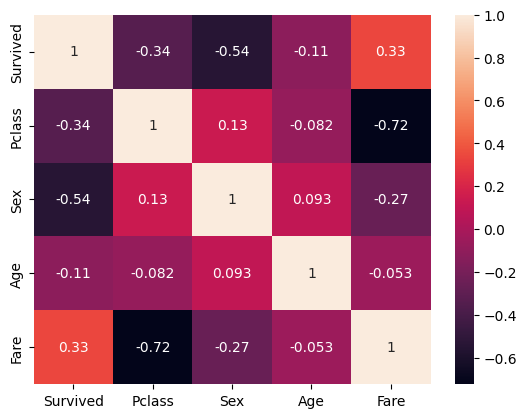

In [48]:
encoder = LabelEncoder()
df_encoder = df.copy()
df_encoder = df_encoder.apply(encoder.fit_transform)
df_encoder =  df_encoder[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
sns.heatmap(df_encoder.corr(), annot=True)

Las variables que usaremos para que KNN pueda procesar los datos son: 'Survived', 'Pclass', 'Sex' y 'Fare'.

Paso 1: Estado inicial de los datos
Total de registros: 891
Valores nulos en age: 177

Estadísticas iniciales:
         Survived      Pclass         Sex         Age        Fare
count  891.000000  891.000000  891.000000  714.000000  891.000000
mean     0.383838    2.308642    0.647587   29.699118   32.204208
std      0.486592    0.836071    0.477990   14.526497   49.693429
min      0.000000    1.000000    0.000000    0.420000    0.000000
25%      0.000000    2.000000    0.000000   20.125000    7.910400
50%      0.000000    3.000000    1.000000   28.000000   14.454200
75%      1.000000    3.000000    1.000000   38.000000   31.000000
max      1.000000    3.000000    1.000000   80.000000  512.329200


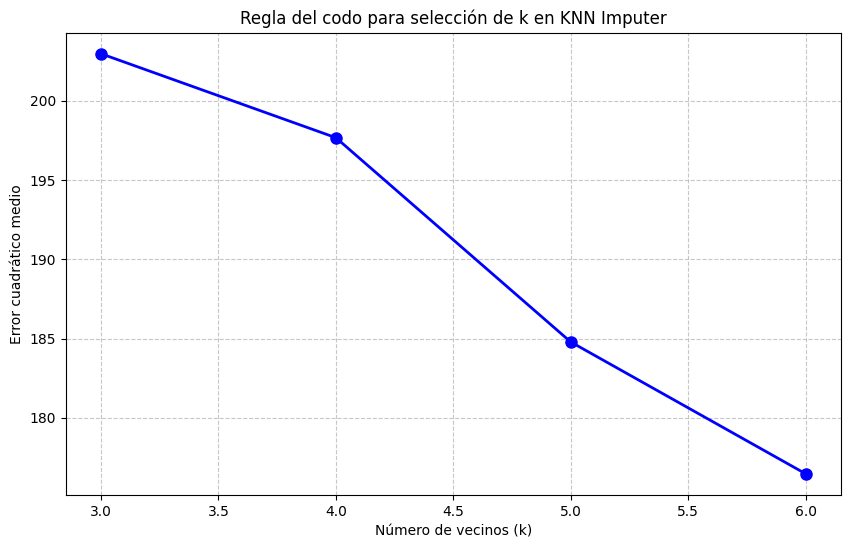


Número óptimo de vecinos (k) encontrado: 4

Estadísticas después de la imputación:
count    891.000000
mean      29.760578
std       12.732446
min        0.420000
25%       22.000000
50%       29.000000
75%       36.062500
max       80.000000
Name: Age, dtype: float64

Estadísticas originales (sin nulos):
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


/var/folders/jv/m28dc0910xgbzzt8gj8r_vlm0000gp/T/ipykernel_2001/1367899287.py:104: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Age'].dropna(), df_final['Age']],


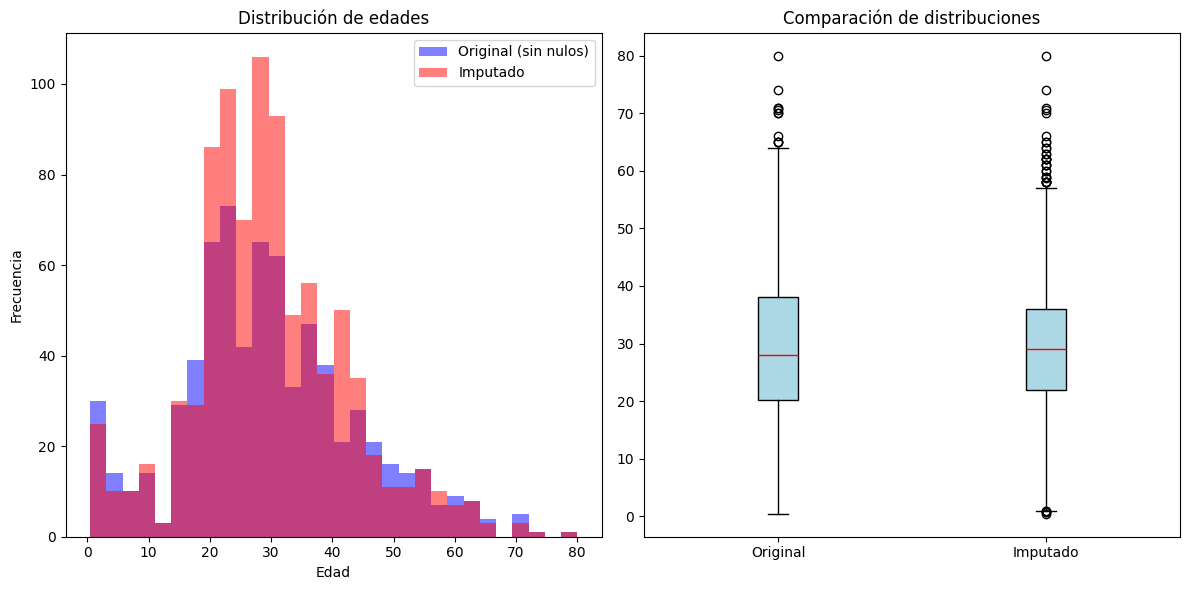


Métricas de calidad de la imputación:
MSE final: 197.68
RMSE final: 14.06


In [49]:
# Paso 1: Cargar y preparar los datos
# Propósito: Cargar el dataset y preparar las variables para el análisis
numeric_features = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare'] # Seleccionar variables que queremos usar para establecer grupos
df_numeric = df[numeric_features].copy()

# Codificar la variable categórica 'sex' usando LabelEncoder
# Propósito: Convertir datos categóricos a numéricos para que KNN pueda procesarlos
le = LabelEncoder()
df_numeric['Sex'] = le.fit_transform(df_numeric['Sex']) # 1=Male 0=Female
df_numeric['Sex'] = df_numeric['Sex'].astype(int)

# Mostrar estado inicial de los datos
print("Paso 1: Estado inicial de los datos")
print(f"Total de registros: {len(df_numeric)}")
print(f"Valores nulos en age: {df_numeric['Age'].isnull().sum()}")
print("\nEstadísticas iniciales:")
print(df_numeric.describe())

# Paso 2: Crear conjunto de validación
# Propósito: Separar datos para poder evaluar la calidad de la imputación
np.random.seed(42)  # Para reproducibilidad
# Seleccionar 20% de los datos con edad conocida para validación
test_mask = df_numeric['Age'].notna() & (np.random.rand(len(df_numeric)) < 0.2)
validation_age = df_numeric.loc[test_mask, 'Age'].copy()
df_numeric.loc[test_mask, 'Age'] = np.nan

# Paso 3: Calcular error para diferentes valores de k
# Propósito: Encontrar el número óptimo de vecinos para KNN
k_values = range(3, 7)  # Probar valores de k entre 3 y 6
mse_values = []

for k in k_values:
    # Aplicar KNN Imputer para cada valor de k
    imputer = KNNImputer(n_neighbors=k)
    data_imputed = imputer.fit_transform(df_numeric)
    
    # Calcular el error medio cuadrático para evaluar la calidad
    mse = mean_squared_error(
        validation_age,
        pd.DataFrame(data_imputed, columns=numeric_features).loc[test_mask, 'Age']
    )
    mse_values.append(mse)

# Paso 4: Visualizar la curva del codo
# Propósito: Visualizar gráficamente el punto óptimo de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Error cuadrático medio')
plt.title('Regla del codo para selección de k en KNN Imputer')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Paso 5: Encontrar el punto de codo
# Propósito: Determinar automáticamente el mejor valor de k
def find_elbow(x, y):
    """
    Encuentra el punto de codo usando el método de la máxima curvatura
    """
    # Calcular primera derivada
    dy = np.diff(y, 1)
    dx = np.diff(x, 1)
    dy_dx = dy/dx
    
    # Calcular segunda derivada
    d2y_dx2 = np.diff(dy_dx, 1)
    
    # Encontrar punto de máxima curvatura
    elbow_idx = np.argmax(np.abs(d2y_dx2)) + 1
    return x[elbow_idx]

optimal_k = find_elbow(np.array(list(k_values)), np.array(mse_values))
print(f"\nNúmero óptimo de vecinos (k) encontrado: {optimal_k}")

# Paso 6: Aplicar KNN con k óptimo
# Propósito: Realizar la imputación final con el mejor k
final_imputer = KNNImputer(n_neighbors=int(optimal_k))
data_final = final_imputer.fit_transform(df_numeric)
df_final = pd.DataFrame(data_final, columns=numeric_features)

# Paso 7: Mostrar resultados y comparaciones
# Propósito: Comparar estadísticas antes y después de la imputación
print("\nEstadísticas después de la imputación:")
print(df_final['Age'].describe())
print("\nEstadísticas originales (sin nulos):")
print(df['Age'].dropna().describe())

# Paso 8: Visualizar distribuciones
# Propósito: Comparar visualmente las distribuciones original e imputada
plt.figure(figsize=(12, 6))

# Histograma comparativo
plt.subplot(1, 2, 1)
plt.hist(df['Age'].dropna(), bins=30, alpha=0.5, label='Original (sin nulos)', color='blue')
plt.hist(df_final['Age'], bins=30, alpha=0.5, label='Imputado', color='red')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de edades')
plt.savefig('Graphics/Histograma_Comparativo_Age.png')
plt.legend()

# Diagrama de cajas
plt.subplot(1, 2, 2)
plt.boxplot([df['Age'].dropna(), df_final['Age']], 
            labels=['Original', 'Imputado'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'))
plt.title('Comparación de distribuciones')

plt.tight_layout()
plt.savefig('Graphics/Diagrama_Caja_Age.png')
plt.show()

# Paso 9: Calcular métricas de calidad
# Propósito: Evaluar cuantitativamente la calidad de la imputación
print("\nMétricas de calidad de la imputación:")
print(f"MSE final: {mse_values[int(optimal_k)-3]:.2f}")  # Ajustado por el rango de k
print(f"RMSE final: {np.sqrt(mse_values[int(optimal_k)-3]):.2f}")


# Y añadimos algunas columnas más para tener un dataset completo para poder analizar en la siguiente fase
df_final['Embarked'] = df['Embarked']
df_final['Parch'] = df['Parch']
df_final ['SibSp'] = df['SibSp']
df_final['Sex'] = df_final['Sex'].astype(int)

Arreglamos las variables para tenerlas más fáciles de leer en el EDA

In [ ]:
# Sumamos el tamaño de la familia y vemos si iban solos o acompañados con una pareja o hermanos
df_final['FamilySize'] = df['SibSp']+df['Parch']
df_final.drop(['SibSp','Parch'],axis=1,inplace=True)

df_final['Alone'] = [0 if df_final['FamilySize'][i]>=1 else 1 for i in df_final.index]

In [51]:
df_final['Embarked'] = df['Embarked'].replace({'S': 'Southampton','C': 'Cheltenham', 'Q': 'Queenstown'})

## Miramos como queda la tabla final

In [52]:
df_final.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Alone
0,0.0,3.0,1,22.000,7.2500,Southampton,1,0
1,1.0,1.0,0,38.000,71.2833,Cheltenham,1,0
2,1.0,3.0,0,26.000,7.9250,Southampton,0,1
3,1.0,1.0,0,35.000,53.1000,Southampton,1,0
4,0.0,3.0,1,25.375,8.0500,Southampton,0,1


In [34]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
 6   Parch     891 non-null    int64  
 7   SibSp     891 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 55.8+ KB


## Finalmente exportamos este nuevo DF a un CVS para poder seguir trabajando con el

In [53]:
df_final.to_csv('Data/Titanic_check.csv', index=False)